In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("salary_data.csv")

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
df.shape

(30, 2)

In [13]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Handling null values

In [14]:
df.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [15]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [16]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# seperate independent and dependent variables

In [22]:
#independent variable should be a dataframe[2d array]

x=df.iloc[:,:1]

In [19]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [31]:
type(x)

pandas.core.frame.DataFrame

In [25]:
#dependent variable should bea 1d array[seies]
y=df.iloc[:,1:2]

In [21]:
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [33]:
type(df["Salary"])

pandas.core.series.Series

Text(0, 0.5, 'y- axis')

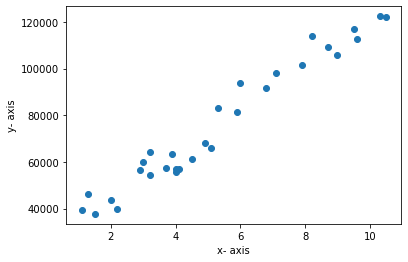

In [27]:
plt.scatter(x,y)
plt.xlabel("x- axis")
plt.ylabel("y- axis")

# TRAIN TEST SPLIT

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
x_train

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24, 1)
(6, 1)


# model building

In [45]:
from sklearn.linear_model import LinearRegression

In [47]:
lr=LinearRegression()

In [49]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y=mx+c

In [50]:
lr.coef_

array([[9312.57512673]])

In [51]:
lr.intercept_

array([26780.09915063])

# TEST model

In [52]:
y_pred=lr.predict(x_test)

In [53]:
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [54]:
y_test

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0


# Evaluation of model

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.988169515729126

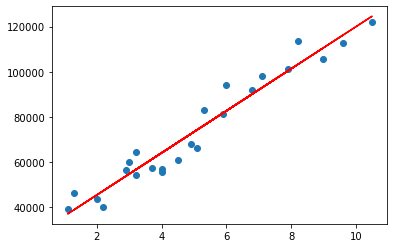

In [58]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color="red")

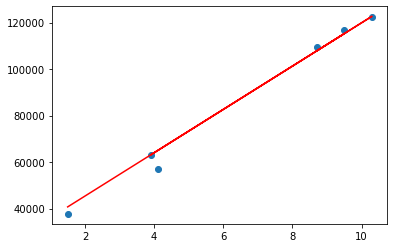

In [59]:
plt.scatter(x_test,y_test)
plt.plot(x_test,lr.predict(x_test),color="red")

In [61]:
lr.predict([[8]])

array([[101280.70016446]])

#  OUTLIER ..EXTENDED

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("insurance.csv")

In [61]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.shape

(1338, 7)

In [8]:
df.size

9366

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [13]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


#outlier detection


C:\Users\adarsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

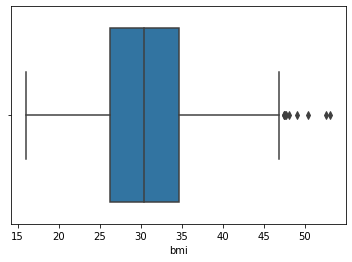

In [16]:
sns.boxplot(df.bmi)

In [24]:
q1=df.bmi.quantile(0.25)
q3=df.bmi.quantile(0.75)


In [21]:
q1

26.3

In [25]:
q3

34.7

In [27]:
IQR=q3-q1
IQR

8.400000000000002

In [32]:
UPPER_LIMIT=q3+1.5*IQR
UPPER_LIMIT

47.300000000000004

In [34]:
LOWER_LIMIT=q1-1.5*IQR
LOWER_LIMIT

13.699999999999998

In [35]:
df.median()

C:\Users\adarsha\AppData\Local\Temp/ipykernel_13860/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


age           39.00
bmi           30.40
children       1.00
expenses    9382.03
dtype: float64

In [63]:
#replacing outliers with meadian with below formula

df['bmi']=np.where(df['bmi']>UPPER_LIMIT,30,df['bmi'])

C:\Users\adarsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

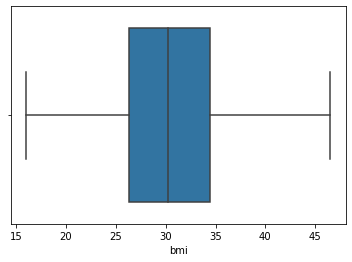

In [64]:
sns.boxplot(df.bmi)

C:\Users\adarsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

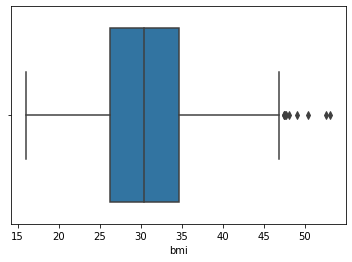

In [85]:

df=pd.read_csv("insurance.csv")
sns.boxplot(df.bmi)

In [11]:
q1=df.bmi.quantile(0.25)
q3=df.bmi.quantile(0.75)

In [12]:
q1


26.3

In [13]:
q3

34.7

In [89]:
IQR=q3-q1
IQR

8.400000000000002

In [90]:
UPPER_LIMIT=q3+1.5*IQR
UPPER_LIMIT

47.300000000000004

In [101]:
df=df[df.bmi<UPPER_LIMIT]

C:\Users\adarsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

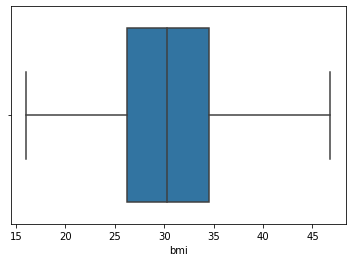

In [92]:
sns.boxplot(df.bmi)

In [93]:
df.shape   #shape will decrease  bcz data will be removed

(1329, 7)

In [1]:

df=pd.read_csv("insurance.csv")
sns.boxplot(df.bmi)

NameError: name 'pd' is not defined

In [103]:
from scipy import stats

In [104]:
bmi_zscore=stats.zscore(df.bmi)
bmi_zscore

0      -0.453646
1       0.514186
2       0.382954
3      -1.306650
4      -0.289606
          ...   
1333    0.054876
1334    0.202511
1335    1.022707
1336   -0.798128
1337   -0.256799
Name: bmi, Length: 1338, dtype: float64

In [108]:
df_z=df[np.abs(bmi_zscore)<=3]

C:\Users\adarsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

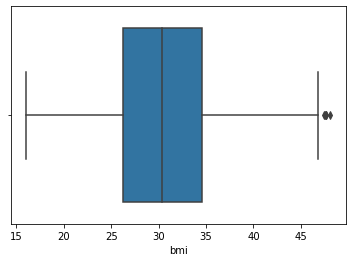

In [109]:
sns.boxplot(df_z.bmi)

In [107]:
df_z.shape

(1334, 7)

3.percentile method

C:\Users\adarsha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

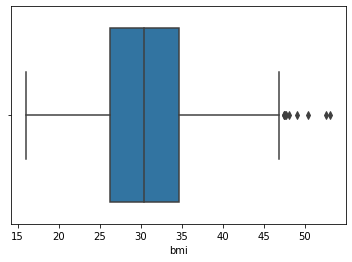

In [110]:
sns.boxplot(df.bmi)

In [111]:
p99=df.bmi.quantile(0.99)

In [112]:
p99

46.38899999999997

In [113]:
df=df[df.bmi<=p99]

<AxesSubplot:xlabel='bmi'>

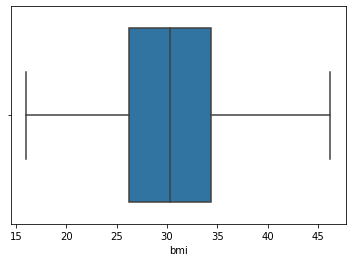

In [116]:
sns.boxplot(df.bmi)

In [114]:
df.shape

(1324, 7)